#### Preamble

In [1]:
import matplotlib
matplotlib.use( "agg" )
%pylab inline

import plt_fmt

from numba import jit

from fig_annotate import *


from diffusion_integrator_funcs import *
from frac_brown import *

from brownian_integrator import *

Populating the interactive namespace from numpy and matplotlib


/Users/william/miniconda/envs/spakenv/lib/python3.4/site-packages/matplotlib/__init__.py:1318: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
from scipy.integrate import ode

## pick parameter values
params = dict()

# width of overall potential well. smaller this is, the stronger the forcing
params['POT_DIAM'] = .05
params['KAPPA'] = 4e-1
params['DCOEFF'] = 1e-6
# alpha less than one
params['ALPHA']= .5


## set integrator settings
settings = dict()

# settings['SPACE_PTS'] = 100
# settings['ACTUAL_LENGTH'] = 10*params['POT_DIAM']

# settings['TIME_PTS'] = 1e6
# settings['START_TIME'] = 0.0
# settings['STOP_TIME'] = 17.0



space_pts = 100
ACTUAL_LENGTH = 10*params['POT_DIAM']


# width of reactive well
params['WELL_DIAM'] = .01


time_pts = 1e6
start_time = 0.0
stop_time = 1e3



# set integrator settings
settings = dict()

dt = (stop_time-start_time)/time_pts
times = linspace(start_time, stop_time, time_pts)
times = times + dt

dx = ACTUAL_LENGTH/space_pts
space = linspace(0.0, ACTUAL_LENGTH, space_pts)
space = space+dx

# initial conditions
y0 = ones(space_pts)

# settings['dx'] = dx
settings['space'] = space
settings['times'] = times

# settings['times'] = time_nondim(times, params)


# r = ode(nxt_step, jacob).set_integrator('vode', method='bdf', with_jacobian=True)
r = ode(nxt_step, radiff_timeop).set_integrator('lsoda', with_jacobian=True)
r.set_initial_value(y0, times[0])

r.set_f_params([settings, params])
r.set_jac_params([settings, params])

t1 = stop_time
sol = list()
while r.successful() and r.t < t1:
    r.integrate(r.t+dt)
    sol.append(r.y)

sol = array(real(sol)).T


# now multiply through by the equilibrium distribution
gauss = eq_dist(space, params['POT_DIAM'])
# gauss = (1/sqrt(2*pi*params['POT_DIAM']**2))*exp(-space**2/(4*params['POT_DIAM']**2))
gauss = gauss[:, None]
sol = sol*gauss


# radpart = 4*pi*(space**2)
# radpart = radpart[:, None]
# sol = sol*radpart

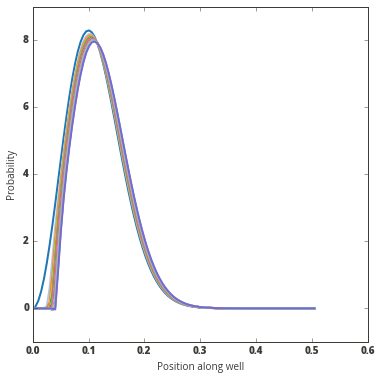

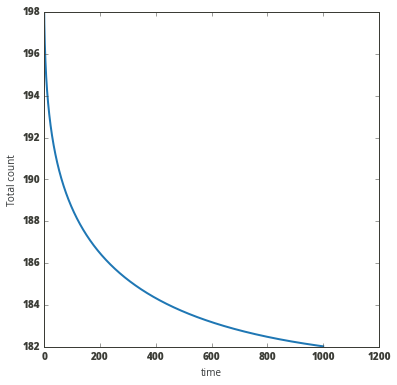

In [5]:
# plot time slices
figure()
solrange = len(sol[0,:])
num_slices = 20
hold(True)
slice_range = floor(solrange/num_slices)
for ii in range(num_slices):
    plot(space, sol[:,ii*slice_range])
plot(space, sol[:,-1])
# ylim([0,.05])
rcParams['font.family']='Open Sans'
xlabel("Position along well")
ylabel("Probability")
namestr = 'alpha_' + str(params['ALPHA']) + '__diffu_' + str(params['DCOEFF'])+'__kappa_' +\
str(params['KAPPA'])+'__reacdiam_' +str(params['WELL_DIAM'])+'__potdiam_' + str(params['POT_DIAM'])
# savefig(namestr+'.pdf')



figure() 
total_conc = sum(sol, axis = 0)
plot(times, total_conc)
ylabel("Total count")
xlabel("time")